In [1]:
import pandas as pd
import numpy as np

In [239]:
df = pd.read_csv(r"C:\Users\GOLLA RAVI TEJA\Downloads\steam_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
1,1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,10000000,3.99,39900000.0
2,2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,10000000,3.99,39900000.0
3,3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,10000000,3.99,39900000.0
4,4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,10000000,3.99,39900000.0


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

In [6]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,10000000,3.99,39900000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,10000000,3.99,39900000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,10000000,3.99,39900000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,10000000,3.99,39900000.0


In [7]:
# The colums are having values separated with ;

df['platforms'] = df['platforms'].str.split(';')
df['categories'] = df['categories'].str.split(';')
df['steamspy_tags'] = df['steamspy_tags'].str.split(';') # we achieve as list of values by removing ;

In [8]:
df = df.explode('platforms')
df = df.explode('categories')
df = df.explode('steamspy_tags')


In [9]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Online Multi-Player,Action,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Online Multi-Player,Action,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0


In [10]:
# Q1 : what platforms are present in the data
# expected answer : ['windows', 'mac', 'linux']
df['platforms'].unique()

array(['windows', 'mac', 'linux'], dtype=object)

In [121]:
# Q2 CEO:  which platform has most no of games

# Answer : windows has maximum no of titles 

windows    27070
mac         8066
linux       5235
dtype: int64

In [11]:
df['platforms'].value_counts()

platforms
windows    262009
mac         95790
linux       68050
Name: count, dtype: int64

In [14]:
# Q3 CEO:  which category has most no of games
df['categories'].value_counts()[0]

111212

In [25]:
df['categories'].value_counts().idxmax()

'Single-player'

In [26]:
df['categories'].value_counts().max()

111212

In [21]:
# Q4  Which Category of games has the highest average play time.
cat_average_playtime = df.groupby('categories')['average_playtime'].mean()

In [24]:
cat_average_playtime

categories
Captions available             376.650931
Co-op                          536.809452
Commentary available           543.752941
Cross-Platform Multiplayer     569.566715
Full controller support        159.786512
In-App Purchases               700.413320
Includes Source SDK           1167.373272
Includes level editor          428.096643
Local Co-op                     95.027189
Local Multi-Player             167.591624
MMO                           1329.256711
Mods                           449.400000
Mods (require HL2)             948.000000
Multi-player                   449.028777
Online Co-op                   406.673759
Online Multi-Player            338.079147
Partial Controller Support     203.467973
Shared/Split Screen            117.484481
Single-player                  165.523559
Stats                          279.796413
Steam Achievements             186.884801
Steam Cloud                    219.600596
Steam Leaderboards             190.219666
Steam Trading Cards    

In [22]:
cat_average_playtime.max()

2651.1767955801106

In [23]:
cat_average_playtime.idxmax()

'Valve Anti-Cheat enabled'

In [29]:
# Q5 how does age influence average play time?
# which age has the highest
# find out sum, average, min, max for average playtimes for different age groups
df['required_age'].value_counts()

required_age
0     415902
18      5406
16      3187
12       939
3        226
7        189
Name: count, dtype: int64

In [31]:
df['genres'] = df['genres'].str.split(';')
df = df.explode('genres')

In [32]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Multi-player,Action,Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Online Multi-Player,Action,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows,0,Online Multi-Player,Action,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,mac,0,Steam Cloud,Casual,Casual,0,4,0,0,0,20000,5.19,103800.0
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,mac,0,Steam Cloud,Indie,Casual,0,4,0,0,0,20000,5.19,103800.0
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,mac,0,Steam Cloud,Adventure,Adventure,0,4,0,0,0,20000,5.19,103800.0
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,mac,0,Steam Cloud,Casual,Adventure,0,4,0,0,0,20000,5.19,103800.0


In [35]:
# Q6 Find out the most frequent platform among the top 5 profitable games.
top_revenue_gen_games = df.sort_values(by='revenue',ascending=False).head(5)

In [39]:
top_revenue_gen_games['platforms'].mode()[0]

'windows'

In [43]:
# Q7 what is the optimal age restriction to make highest profit profitable game ?
age_revenue = df.groupby('required_age')['revenue'].sum()

In [45]:
age_revenue.max()

2786260241800.0

In [46]:
age_revenue.idxmax()

0

# ChatGPT qns 
# Beginner-Level (Basic Understanding):

In [48]:
# 1. How many games are in the dataset?
# 2. What are the names of the first 5 games in the dataset?
# 3. How many games are in English ?
# 4. What is the average price of the games in the dataset ?
# 5. Which game has the highest number of positive ratings?
df['name'].nunique()


27033

In [51]:
# 1. How many games are in the dataset?
f.shape[0]

1240080

In [52]:
# 2. What are the names of the first 5 games in the dataset?
df['name'].head()


0    Counter-Strike
0    Counter-Strike
0    Counter-Strike
0    Counter-Strike
0    Counter-Strike
Name: name, dtype: object

In [58]:
# 3. How many games are in English?
df[df['english']==1].shape[0]

1229027

In [59]:
# 4. What is the average price of the games in the dataset?
df['price'].mean()

6.712173924262952

In [63]:
# 5. Which game has the highest number of positive ratings?
#df['positive_ratings'].max()
df.iloc[df['positive_ratings'].idxmax()]


appid                           10
name                Counter-Strike
release_date            2000-11-01
english                          1
developer                    Valve
publisher                    Valve
platforms                    linux
required_age                     0
categories            Multi-player
genres                      Action
steamspy_tags                  FPS
achievements                     0
positive_ratings            124534
negative_ratings              3339
average_playtime             17612
median_playtime                317
owners                    20000000
price                         7.19
revenue                143800000.0
Name: 0, dtype: object

In [66]:
# 6. How many unique developers are listed in the dataset?
df['developer'].nunique()


17112

In [67]:
# 7. What is the most common platform for the games in this dataset?
df['platforms'].mode()


0    windows
Name: platforms, dtype: object

In [70]:
# 8. How many games have a required age of 18 or higher?
df[df['required_age']>=18].shape[0]


13366

In [72]:
# 9. What is the total revenue generated by all games in the dataset?
df['revenue'].sum()


3293890791500.0

In [76]:
# 10. How many games have more than 50 achievements?
df[df['achievements']>50].shape[0]

154746

In [130]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

# Intermediate-Level (Deeper Insights):

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# 1. What is the correlation between the price of a game and its positive ratings?
df['price'].corr(df['price'])



1.0

In [88]:
# 2. How many games are published by the publisher "Indie Voyage"?
df[df['publisher']=='Indie Voyage'].shape[0]

294

In [131]:
# 3. What is the median playtime for games that have over 100 positive ratings?
df[df['positive_ratings']>100]['median_playtime'].median()

113.0

In [133]:
# 4. What percentage of games have at least 1 Steam achievement?
df[df['achievements']>0].shape[0]


951068

In [134]:
(df[df['achievements']>0].shape[0]/df.shape[0])*100

76.69408425262885

In [109]:
# 5. How many games are classified under the "Action" genre?
df[df['genres']=='Action'].shape[0]


213752

In [112]:
# 6. What is the average number of negative ratings for games with over 10,000 owners?
neg_rat = df[df['owners']>10000]


In [113]:
neg_rat['negative_ratings'].mean()

419.96281530223854

In [135]:
df[df['owners']>10000]['negative_ratings'].mean()

419.96281530223854

In [137]:
# 7. Which developer has the most games listed in the dataset?
df['developer'].value_counts().idxmax()

'Choice of Games'

In [140]:
df['developer'].value_counts()

0    18
Name: count, dtype: int64

In [138]:
df['developer'].value_counts().max()

8919

In [141]:
# 8. What is the average playtime for games with more than 500 positive ratings?
df[df['positive_ratings']>500]['average_playtime'].mean()

977.5184374164882

In [124]:
# 9. How many games are tagged as "Early Access" in their steamspy_tags?
df[df['steamspy_tags']=='Early Access'].shape[0]


58866

In [128]:
# 10. What is the total revenue generated by games that have "RPG" in their genre?
df[df['genres']=='RPG']['revenue'].sum()

331831848000.0

# Advanced-Level (Complex Analysis):

In [142]:
# 1. What is the relationship between a game's price and its revenue? Is there a positive or negative correlation?
df['price'].corr(df['revenue'])


0.25118186216493693

In [143]:
import matplotlib.pyplot as plt

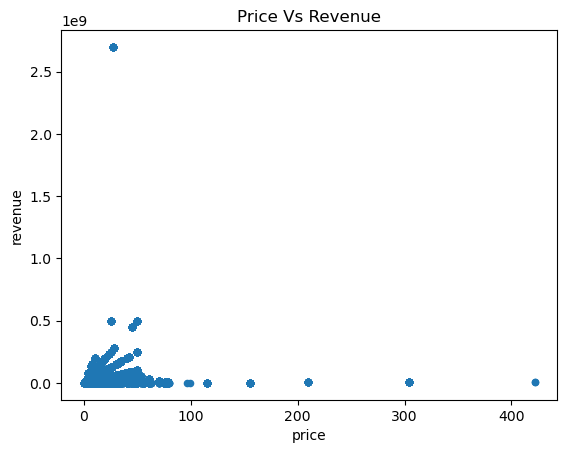

In [148]:
df.plot(kind='scatter', x='price', y='revenue', title='Price Vs Revenue')
plt.show()

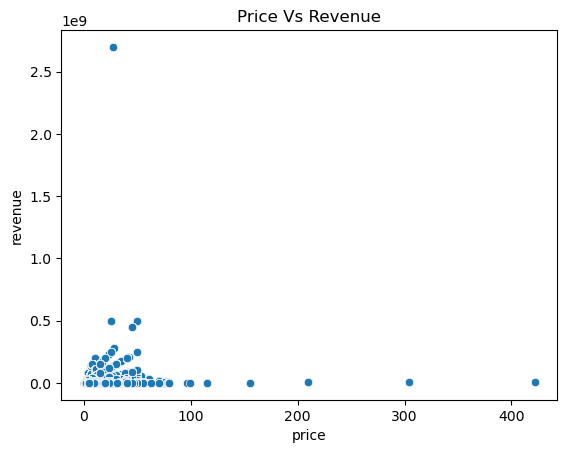

In [145]:
import seaborn as sns
sns.scatterplot(x='price', y='revenue', data=df)
plt.title('Price Vs Revenue')
plt.show() # Positive relation

In [177]:
# 2. What is the average number of positive ratings for games released before 2015 compared to those released after 2015?
import datetime

In [178]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [179]:
df['release_year'] = df['release_date'].dt.year

In [180]:
df['release_year']

0        2000
0        2000
0        2000
0        2000
0        2000
         ... 
27074    2019
27074    2019
27074    2019
27074    2019
27074    2019
Name: release_year, Length: 1240080, dtype: int32

In [182]:
df[df['release_year']<2015]['positive_ratings'].mean() # before 2015

10530.442742086292

In [184]:
df[df['release_year']>=2015]['positive_ratings'].mean() # after 2015

1301.71141040423

In [188]:
# 3. Find the top 5 genres that generate the highest average revenue.
avg_high_rev = df.groupby('genres')['revenue'].mean()
avg_high_rev.nlargest(5)



genres
Massively Multiplayer    7.066882e+06
Web Publishing           5.400067e+06
RPG                      4.429740e+06
Action                   3.992250e+06
Nudity                   3.970000e+06
Name: revenue, dtype: float64

In [164]:
# 4. What is the average price for games with more than 50 achievements and more than 100 positive ratings?
df[(df['achievements']>50) & (df['positive_ratings']>100)]['price'].mean()


10.481265621563256

In [165]:
# 5. How many games are available on multiple platforms (e.g., Windows and another platform)?
df.shape[0]


1240080

In [193]:
# 6. Which genre has the highest number of games with over 1,000 positive ratings?
df[df['positive_ratings']>1000]['genres'].value_counts()


genres
[Indie]                    41094
[Action]                   36036
[Adventure]                23685
[Strategy]                 16542
[RPG]                      15888
[Simulation]               13002
[Casual]                   10158
[Free to Play]              7998
[Massively Multiplayer]     4224
[Early Access]              3885
[Sports]                    2520
[Racing]                    2394
[Violent]                   1014
[Gore]                       702
[Nudity]                     666
[Sexual Content]             498
[Design & Illustration]       36
[Utilities]                   34
[Animation & Modeling]        24
[Web Publishing]              24
[Video Production]            12
Name: count, dtype: int64

In [194]:
df[df['positive_ratings']>1000]['genres'].value_counts().max()


41094

In [195]:
df[df['positive_ratings']>1000]['genres'].value_counts().idxmax()


['Indie']

In [197]:
# 7. For games with a price higher than $20, what is the median playtime compared to games priced under $20?
df[df['price']>20]['median_playtime'].median()

186.0

In [198]:
df[df['price']<20]['median_playtime'].median()

0.0

In [ ]:
# 8. Build a model to predict the number of positive ratings based on features like price, release date, and genre.



#### Model Buliding

In [201]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue,release_year
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,[Action],Action,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,[Action],FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,[Action],Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Online Multi-Player,[Action],Action,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Online Multi-Player,[Action],FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000


In [241]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [242]:
df['release_year'] = df['release_date'].dt.year

#### Segregating the data

In [243]:
feature_var = df[['release_year','price','genres']]

In [244]:
class_var = df['positive_ratings']

In [245]:
feature_var

,release_year,price,genres
0,2000,7.19,Action
1,1999,3.99,Action
2,2003,3.99,Action
3,2001,3.99,Action
4,1999,3.99,Action
...,...,...,...
27070,2019,2.09,Adventure;Casual;Indie
27071,2019,1.69,Action;Adventure;Indie
27072,2019,3.99,Action;Casual;Indie
27073,2019,5.19,Adventure;Casual;Indie


In [222]:
class_var.shape

(1240080,)

In [246]:
df['genres'].str.split(';')

0                          [Action]
1                          [Action]
2                          [Action]
3                          [Action]
4                          [Action]
                    ...            
27070    [Adventure, Casual, Indie]
27071    [Action, Adventure, Indie]
27072       [Action, Casual, Indie]
27073    [Adventure, Casual, Indie]
27074    [Adventure, Casual, Indie]
Name: genres, Length: 27075, dtype: object

In [248]:
feature_var['genres'] = feature_var['genres'].str.split(';')

C:\Users\GOLLA RAVI TEJA\AppData\Local\Temp\ipykernel_56292\3074665831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_var['genres'] = feature_var['genres'].str.split(';')


In [251]:
feature_var.explode(feature_var['genres'])

ValueError: column must be a scalar, tuple, or list thereof

In [ ]:
fea

In [238]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue,release_year
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,nan,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,nan,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Multi-player,nan,Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Online Multi-Player,nan,Action,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,[windows],0,Online Multi-Player,nan,FPS,0,124534,3339,17612,317,20000000,7.19,143800000.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,[mac],0,Steam Cloud,nan,Casual,0,4,0,0,0,20000,5.19,103800.0,2019
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,[mac],0,Steam Cloud,nan,Casual,0,4,0,0,0,20000,5.19,103800.0,2019
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,[mac],0,Steam Cloud,nan,Adventure,0,4,0,0,0,20000,5.19,103800.0,2019
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,[mac],0,Steam Cloud,nan,Adventure,0,4,0,0,0,20000,5.19,103800.0,2019


### Splitting data into train test split

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(feature_var, class_var, test_size=0.2, random_state=10, stratify=class_var)

In [226]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(992064, 3) (992064,)
(248016, 3) (248016,)


### Data preprocessing on Train Data

In [227]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [228]:
std = StandardScaler()
X_train_ts = std.fit_transform(X_train)
X_test_ts  = std.transform(X_test)

ValueError: setting an array element with a sequence.

In [229]:
X_train.dtypes

release_year      int32
price           float64
genres           object
dtype: object

In [ ]:
# 9. Identify games that have a high number of negative ratings relative to positive ratings. What are the common characteristics of these games?

In [ ]:
# 10. What is the most significant factor affecting a game's revenue based on the dataset? Perform a regression analysis to determine this.
